In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
data = pd.read_csv('chatlogs.csv')

In [3]:
data.head(10)

,Unnamed: 0,message,association_to_offender,time,case_total_reports,allied_report_count,enemy_report_count,most_common_report_reason,chatlog_id,champion_name
0,0,gold 2 zed,enemy,00:00:21,8,0,2,Negative Attitude,1,Udyr
1,1,IIII,enemy,00:00:27,8,0,2,Negative Attitude,1,Riven
2,2,nice premade lie :o,enemy,00:00:27,8,0,2,Negative Attitude,1,Udyr
3,3,ISI,enemy,00:00:28,8,0,2,Negative Attitude,1,Riven
4,4,smiteless pls,enemy,00:00:43,8,0,2,Negative Attitude,1,Udyr
5,5,smiteless pls,enemy,00:00:57,8,0,2,Negative Attitude,1,Udyr
6,6,riven?,enemy,00:01:10,8,0,2,Negative Attitude,1,Udyr
7,7,report top no help jnh,enemy,00:01:53,8,0,2,Negative Attitude,1,Udyr
8,8,warded there,enemy,00:08:12,8,0,2,Negative Attitude,1,Udyr
9,9,K,enemy,00:08:17,8,0,2,Negative Attitude,1,Riven


In [4]:
data.info

<bound method DataFrame.info of          Unnamed: 0              message association_to_offender      time  \
0                 0           gold 2 zed                   enemy  00:00:21   
1                 1                 IIII                   enemy  00:00:27   
2                 2  nice premade lie :o                   enemy  00:00:27   
3                 3                  ISI                   enemy  00:00:28   
4                 4        smiteless pls                   enemy  00:00:43   
...             ...                  ...                     ...       ...   
1697217     1697217                   gg                offender  00:28:23   
1697218     1697218                   gg                   enemy  00:28:26   
1697219     1697219                   gg                   enemy  00:28:27   
1697220     1697220                   gg                   enemy  00:28:28   
1697221     1697221                easy.                   enemy  00:28:30   

         case_total_reports  al

In [5]:
data.nunique()


Unnamed: 0                   1697222
message                       882688
association_to_offender            3
time                            4265
case_total_reports                16
allied_report_count                5
enemy_report_count                 6
most_common_report_reason          6
chatlog_id                     10058
champion_name                    117
dtype: int64

In [6]:
data.isnull().sum()

Unnamed: 0                     0
message                       29
association_to_offender      104
time                           0
case_total_reports             0
allied_report_count            0
enemy_report_count             0
most_common_report_reason      0
chatlog_id                     0
champion_name                104
dtype: int64

In [7]:
(data.isnull().sum()/(len(data)))*100

Unnamed: 0                   0.000000
message                      0.001709
association_to_offender      0.006128
time                         0.000000
case_total_reports           0.000000
allied_report_count          0.000000
enemy_report_count           0.000000
most_common_report_reason    0.000000
chatlog_id                   0.000000
champion_name                0.006128
dtype: float64

In [8]:
data = data.drop(['Unnamed: 0'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697222 entries, 0 to 1697221
Data columns (total 9 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   message                    object
 1   association_to_offender    object
 2   time                       object
 3   case_total_reports         int64 
 4   allied_report_count        int64 
 5   enemy_report_count         int64 
 6   most_common_report_reason  object
 7   chatlog_id                 int64 
 8   champion_name              object
dtypes: int64(4), object(5)
memory usage: 116.5+ MB


In [9]:
data = data.drop(['chatlog_id'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697222 entries, 0 to 1697221
Data columns (total 8 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   message                    object
 1   association_to_offender    object
 2   time                       object
 3   case_total_reports         int64 
 4   allied_report_count        int64 
 5   enemy_report_count         int64 
 6   most_common_report_reason  object
 7   champion_name              object
dtypes: int64(3), object(5)
memory usage: 103.6+ MB


In [10]:
data.head()

,message,association_to_offender,time,case_total_reports,allied_report_count,enemy_report_count,most_common_report_reason,champion_name
0,gold 2 zed,enemy,00:00:21,8,0,2,Negative Attitude,Udyr
1,IIII,enemy,00:00:27,8,0,2,Negative Attitude,Riven
2,nice premade lie :o,enemy,00:00:27,8,0,2,Negative Attitude,Udyr
3,ISI,enemy,00:00:28,8,0,2,Negative Attitude,Riven
4,smiteless pls,enemy,00:00:43,8,0,2,Negative Attitude,Udyr


In [11]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
message,1697193,882688,gj,28326,NaN,NaN,NaN,NaN,NaN,NaN,NaN
association_to_offender,1697118,3,enemy,712996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,1697222,4265,00:01:18,1547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
case_total_reports,1697222.0,NaN,NaN,NaN,5.901944,2.266064,2.0,5.0,6.0,7.0,23.0
allied_report_count,1697222.0,NaN,NaN,NaN,1.38888,0.885622,0.0,1.0,1.0,2.0,4.0
enemy_report_count,1697222.0,NaN,NaN,NaN,0.566403,0.865286,0.0,0.0,0.0,1.0,5.0
most_common_report_reason,1697222,6,Verbal Abuse,570122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
champion_name,1697118,117,Lee Sin,61197,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['message', 'association_to_offender', 'time',
       'most_common_report_reason', 'champion_name'],
      dtype='object')
Numerical Variables:
['case_total_reports', 'allied_report_count', 'enemy_report_count']


case_total_reports
Skew : 0.35


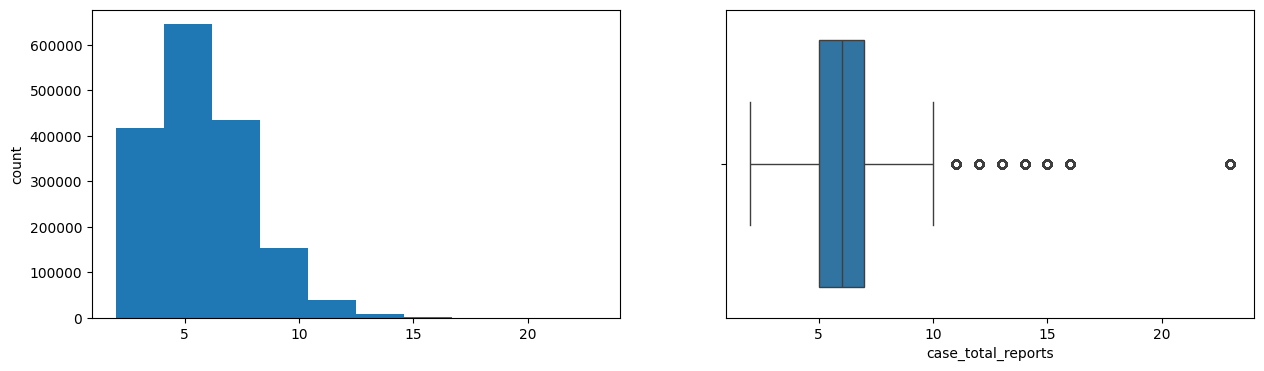

allied_report_count
Skew : 0.17


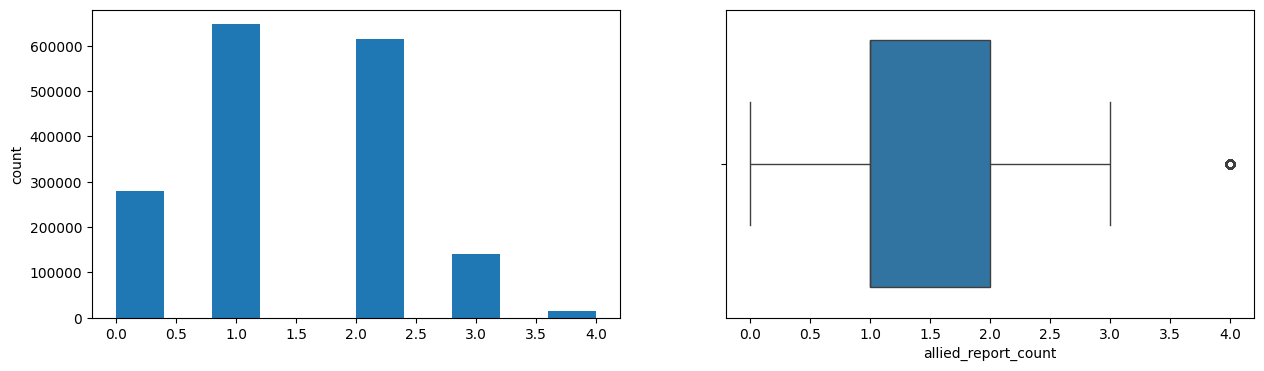

enemy_report_count
Skew : 1.61


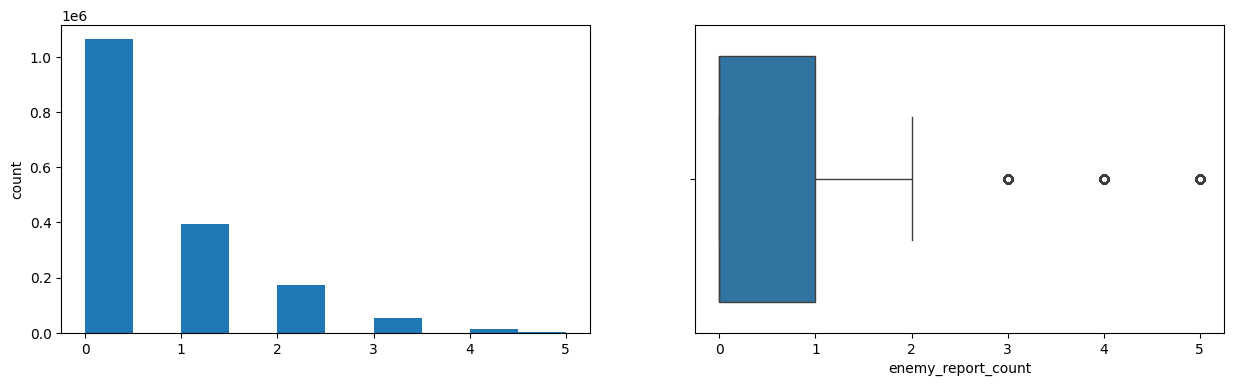

In [13]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

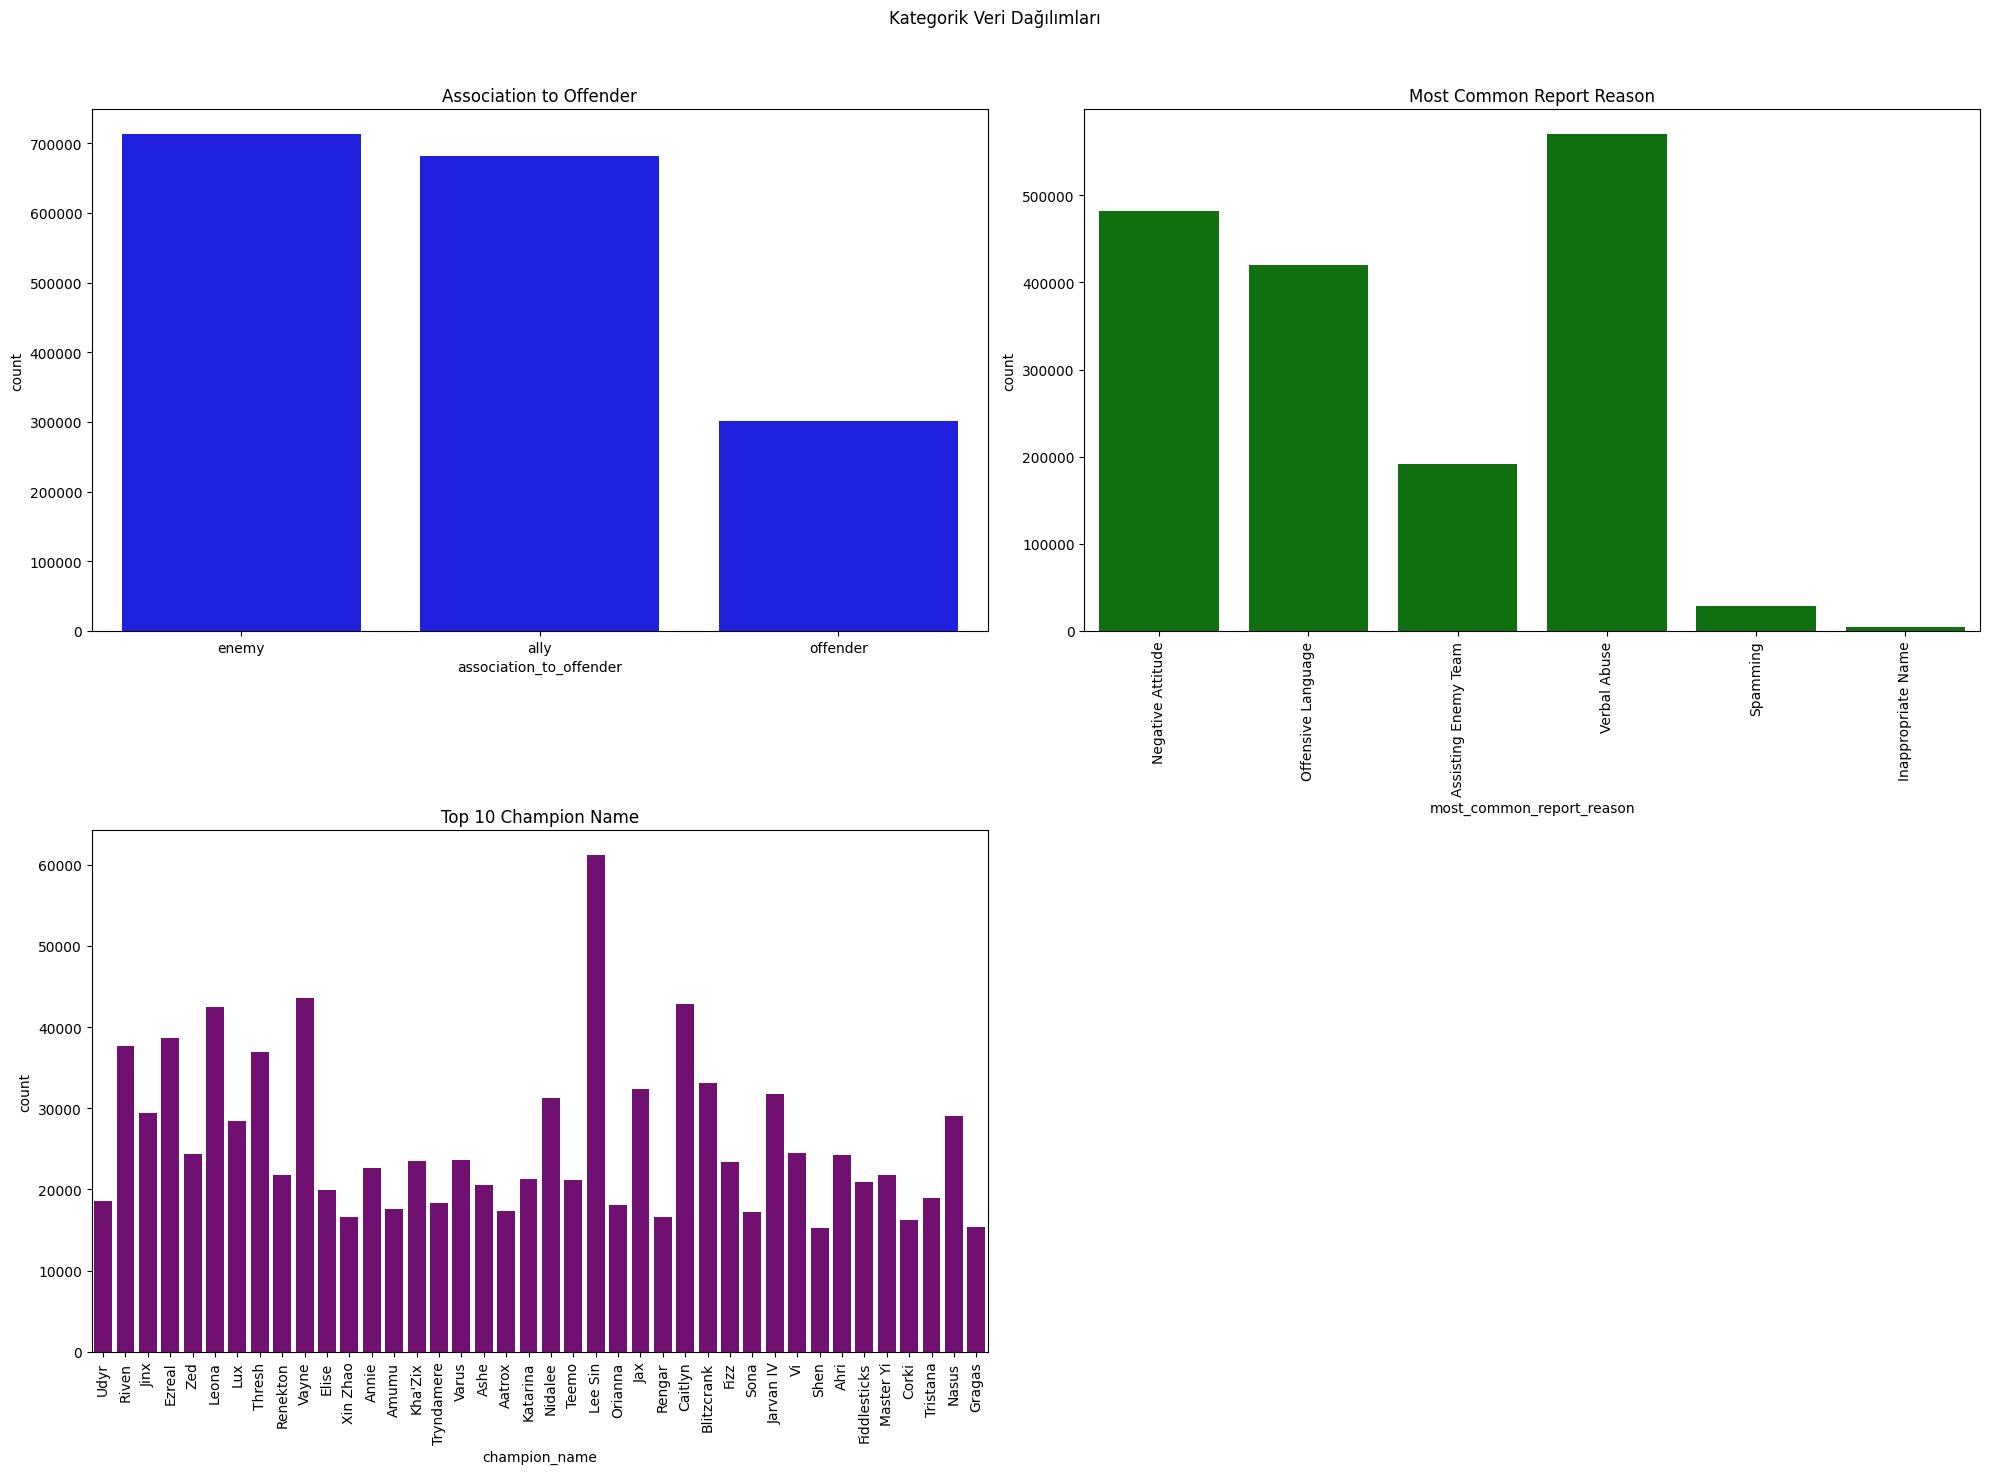

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))  
fig.suptitle('Kategorik Veri Dağılımları')

# association_to_offender için
sns.countplot(ax=axes[0, 0], x='association_to_offender', data=data, color='blue')
axes[0, 0].set_title('Association to Offender')

# most_common_report_reason için
sns.countplot(ax=axes[0, 1], x='most_common_report_reason', data=data, color='green')
axes[0, 1].set_title('Most Common Report Reason')
axes[0, 1].tick_params(axis='x', rotation=90)

# champion_name değeri değiştirerek istenilen miktarda gösterir
top_champions = data['champion_name'].value_counts().nlargest(40).index
sns.countplot(ax=axes[1, 0], x='champion_name', data=data[data['champion_name'].isin(top_champions)], color='purple')
axes[1, 0].set_title('Top 10 Champion Name')
axes[1, 0].tick_params(axis='x', rotation=90)

fig.delaxes(axes[1, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()


In [15]:
from collections import Counter
import re

# Örnek olarak 'message' sütunundaki metinleri alıyoruz (sen kendi sütununu kullanabilirsin)
text_data = " ".join(data['message'].astype(str))  # Tüm mesajları tek bir metin haline getiriyoruz

# Metni temizleme: Noktalama işaretlerini kaldır, küçük harfe çevir
cleaned_text = re.sub(r'[^\w\s]', '', text_data.lower())

# Kelimeleri ayırma
words = cleaned_text.split()

# Kelimeleri sayma
word_counts = Counter(words)

# En çok geçen 10 kelimeyi bulma
most_common_words = word_counts.most_common(10)

# Sonuçları yazdırma
for word, count in most_common_words:
    print(f"{word}: {count}")


i: 120055
you: 76736
u: 71716
and: 66326
no: 50906
gg: 45033
gj: 41499
me: 41020
to: 40611
is: 37977


In [16]:
!pip install nltk



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import nltk
from collections import Counter
import re

# NLTK stopwords'i indirme
nltk.download('stopwords')
from nltk.corpus import stopwords

# Örnek olarak 'message' sütunundaki metinleri alıyoruz (sen kendi sütununu kullanabilirsin)
text_data = " ".join(data['message'].astype(str))  # Tüm mesajları tek bir metin haline getiriyoruz

# Metni temizleme: Noktalama işaretlerini kaldır, küçük harfe çevir
cleaned_text = re.sub(r'[^\w\s]', '', text_data.lower())

# Kelimeleri ayırma
words = cleaned_text.split()

# İngilizce stopwords listesini alıyoruz
stop_words = set(stopwords.words('english'))

# Stopwords olmayan kelimeleri filtreleme
filtered_words = [word for word in words if word not in stop_words]

# Kelimeleri sayma
word_counts = Counter(filtered_words)

# En çok geçen 10 kelimeyi bulma
most_common_words = word_counts.most_common(50)

# Sonuçları yazdırma
for word, count in most_common_words:
    print(f"{word}: {count}")


[nltk_data] Downloading package stopwords to C:\Users\Halid Buğra
[nltk_data]     Gökdeniz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


u: 71716
gg: 45033
gj: 41499
lol: 36345
dont: 36183
go: 35921
report: 34198
xd: 30030
mid: 27586
bot: 26731
top: 26156
pls: 23436
noob: 22038
omg: 21128
ss: 20662
ty: 20264
im: 19839
team: 19067
ok: 17127
need: 17076
wtf: 16726
wp: 16376
play: 15714
help: 15573
nice: 15167
blue: 15082
stop: 15066
game: 14653
bad: 13976
cant: 13584
yes: 13542
push: 13004
come: 12969
get: 12817
ward: 12759
got: 12285
win: 12277
kill: 12112
2: 11816
guys: 11240
lee: 11111
ult: 10969
sry: 10691
feed: 10592
gank: 10584
afk: 10557
1: 10408
good: 10192
like: 10169
time: 9915


In [18]:
# 'message' sütunundaki her bir metnin kelime sayısını hesapla
message_lengths = data['message'].astype(str).apply(lambda x: len(x.split()))

# Ortalama kelime uzunluğunu hesapla
average_length = message_lengths.mean()

print(f"Ortalama kelime uzunluğu: {average_length:.2f}")


Ortalama kelime uzunluğu: 2.87


[nltk_data] Downloading package stopwords to C:\Users\Halid Buğra
[nltk_data]     Gökdeniz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Halid Buğra Gökdeniz\AppData\Local\Temp\ipykernel_9588\487649021.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


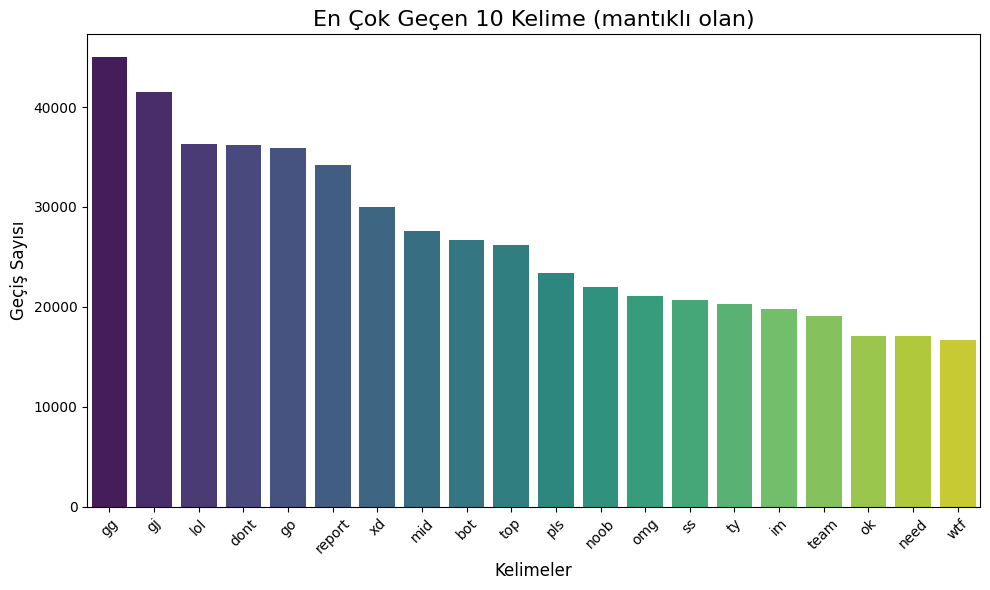

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Örnek olarak 'message' sütunundaki metinleri alıyoruz (kendi verini kullanabilirsin)
text_data = " ".join(data['message'].astype(str))  # Tüm mesajları tek bir metin haline getiriyoruz

# Metni temizleme: Noktalama işaretlerini kaldır, küçük harfe çevir
cleaned_text = re.sub(r'[^\w\s]', '', text_data.lower())

# Kelimeleri ayırma
words = cleaned_text.split()

# İngilizce stopwords listesini alıyoruz
stop_words = set(stopwords.words('english'))

# Stopwords olmayan kelimeleri filtreleme ve spesifik bir kelimeyi de çıkartıyoruz (örneğin "specific_word")
specific_word = 'u'  # Çıkarmak istediğin kelimeyi buraya yaz
filtered_words = [word for word in words if word not in stop_words and word != specific_word]

# Kelimeleri sayma
word_counts = Counter(filtered_words)

# En çok geçen 10 kelimeyi bulma
most_common_words = word_counts.most_common(20)

# Kelimeleri ve sayılarını ayrı listelere ayır
words, counts = zip(*most_common_words)

# Çubuk grafiği oluşturma
plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(counts), palette='viridis')

# Grafiğe başlık ve etiketler ekleyelim
plt.title('En Çok Geçen 10 Kelime (mantıklı olan)', fontsize=16)
plt.xlabel('Kelimeler', fontsize=12)
plt.ylabel('Geçiş Sayısı', fontsize=12)

# X eksenindeki kelimeleri 90 derece döndür (eğer kelimeler üst üste binerse)
plt.xticks(rotation=45)

# Grafiği gösterme
plt.tight_layout()
plt.show()


In [20]:
pip install zemberek-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
# geleneksel makine öğrenmesi yöntemlerini de uygula
# tf-IDF counter tablosu terim frekans matrisi yapılacak. IDF istatistik vericek. ikisini de uygula. Her text için yapılacak. Count vectorizer de kullan

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import re

df = pd.read_csv("chatlogs.csv")  

df["message"] = df["message"].fillna("")

df["message"] = df["message"].apply(lambda x: re.sub(r'\W|\d', ' ', x))

tfidf_vectorizer = TfidfVectorizer(max_features=10)

tfidf_matrix = tfidf_vectorizer.fit_transform(df["message"])

tfidf_sample_df = pd.DataFrame(
    tfidf_matrix[:20].toarray(), 
    columns=tfidf_vectorizer.get_feature_names_out()
)

print("TF-IDF İlk 5 Satır:")
print(tfidf_sample_df)


TF-IDF İlk 5 Satır:
    and   gg   gj        is  lol   me   no   to   we       you
0   0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000
1   0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000
2   0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000
3   0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000
4   0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000
5   0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000
6   0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000
7   0.0  0.0  0.0  0.000000  0.0  0.0  1.0  0.0  0.0  0.000000
8   0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000
9   0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000
10  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000
11  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000
12  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000
13  0.0  0.0  0.0  0.759873  0.0  0.0  0.0  0.0  0.0  0.650072
14  0.0  0.0  0.0  0.000000  0.0  0

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re

df = pd.read_csv("chatlogs.csv")  

df["message"] = df["message"].fillna("")

df["message"] = df["message"].apply(lambda x: re.sub(r'\W|\d', ' ', x))

count_vectorizer = CountVectorizer(max_features=10)
count_matrix = count_vectorizer.fit_transform(df["message"])

count_sample_df = pd.DataFrame(
    count_matrix[:50].toarray(), 
    columns=count_vectorizer.get_feature_names_out()
)

print("Count Vectorizer İlk 5 Satır:")
print(count_sample_df)


Count Vectorizer İlk 5 Satır:
    and  gg  gj  is  lol  me  no  to  we  you
0     0   0   0   0    0   0   0   0   0    0
1     0   0   0   0    0   0   0   0   0    0
2     0   0   0   0    0   0   0   0   0    0
3     0   0   0   0    0   0   0   0   0    0
4     0   0   0   0    0   0   0   0   0    0
5     0   0   0   0    0   0   0   0   0    0
6     0   0   0   0    0   0   0   0   0    0
7     0   0   0   0    0   0   1   0   0    0
8     0   0   0   0    0   0   0   0   0    0
9     0   0   0   0    0   0   0   0   0    0
10    0   0   0   0    0   0   0   0   0    0
11    0   0   0   0    0   0   0   0   0    0
12    0   0   0   0    0   0   0   0   0    0
13    0   0   0   1    0   0   0   0   0    1
14    0   0   0   0    0   0   0   0   0    0
15    0   0   0   0    0   0   0   0   0    0
16    0   0   0   0    0   0   0   0   0    0
17    0   0   0   0    0   0   0   0   0    0
18    0   0   0   0    0   0   0   0   0    0
19    0   0   0   0    0   0   1   0   0    0
20  

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv("chatlogs.csv")

data = data[~data['most_common_report_reason'].isin(['Inappropriate Name', 'Spamming', 'Assisting Enemy Team'])]

data = data.dropna(subset=['message', 'most_common_report_reason']).iloc[:100000]
data = data[data['message'].str.strip() != '']

text_data = data['message']
labels = data['most_common_report_reason']

tfidf_vectorizer = TfidfVectorizer(max_features=200)
X_tfidf = tfidf_vectorizer.fit_transform(text_data)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.3, random_state=42)

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.3917
Confusion Matrix:
 [[1958  416 7675]
 [1364  402 6365]
 [1947  482 9391]]
Classification Report:
                     precision    recall  f1-score   support

 Negative Attitude       0.37      0.19      0.26     10049
Offensive Language       0.31      0.05      0.09      8131
      Verbal Abuse       0.40      0.79      0.53     11820

          accuracy                           0.39     30000
         macro avg       0.36      0.35      0.29     30000
      weighted avg       0.37      0.39      0.32     30000



In [25]:
#pca kullan

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import pandas as pd

# Veriyi yükleyelim
data = pd.read_csv("chatlogs.csv")

# İlk 30.000 veriyi seçelim ve eksik veya boş verileri temizleyelim
data = data.dropna(subset=['message', 'most_common_report_reason']).iloc[:70000]
data = data[data['message'].str.strip() != '']

# Metin verisini ve etiketleri ayıralım
text_data = data['message']
labels = data['most_common_report_reason']

# TF-IDF özellik çıkarımı (en çok kullanılan 200 kelime)
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X_tfidf = tfidf_vectorizer.fit_transform(text_data)

# SVD ile boyut indirgeme (3 boyuta indir)
svd = TruncatedSVD(n_components=3, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)

# Etiketleri sayısal verilere dönüştürme
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)
y_categorical = to_categorical(y_encoded)

# Eğitim ve test verilerini ayıralım
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_categorical, test_size=0.3, random_state=42)

# Yapay sinir ağı modelini tanımlayalım
model = Sequential([
    Dense(256, input_dim=3, activation='relu'),
    Dense(124, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])

# Modeli derleyelim
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitelim
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Modelin başarımını değerlendirme
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


Epoch 1/50


C:\Users\Halid Buğra Gökdeniz\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1532/1532 ━━━━━━━━━━━━━━━━━━━━ 2s 890us/step - accuracy: 0.3204 - loss: 1.3956 - val_accuracy: 0.3200 - val_loss: 1.3621
Epoch 2/50
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step - accuracy: 0.3264 - loss: 1.3555 - val_accuracy: 0.3334 - val_loss: 1.3583
Epoch 3/50
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - accuracy: 0.3301 - loss: 1.3551 - val_accuracy: 0.3188 - val_loss: 1.3628
Epoch 4/50
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - accuracy: 0.3255 - loss: 1.3554 - val_accuracy: 0.3342 - val_loss: 1.3594
Epoch 5/50
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - accuracy: 0.3315 - loss: 1.3558 - val_accuracy: 0.3330 - val_loss: 1.3583
Epoch 6/50
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 1s 802us/step - accuracy: 0.3307 - loss: 1.3564 - val_accuracy: 0.3342 - val_loss: 1.3585
Epoch 7/50
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.3253 - loss: 1.3581 - val_accuracy: 0.3336 - val_loss: 1.3580
Epoch 8/50
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.3283 - loss: 1.35

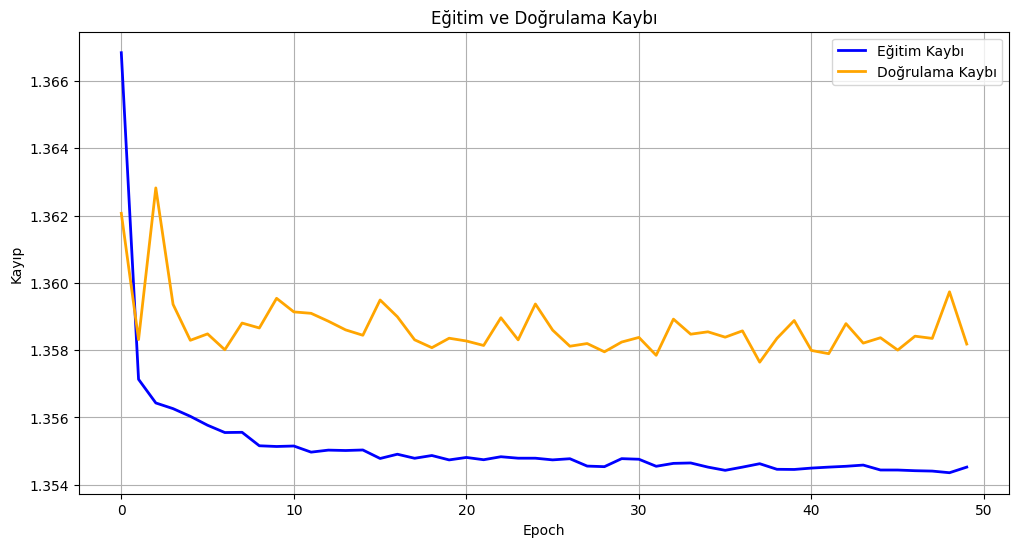

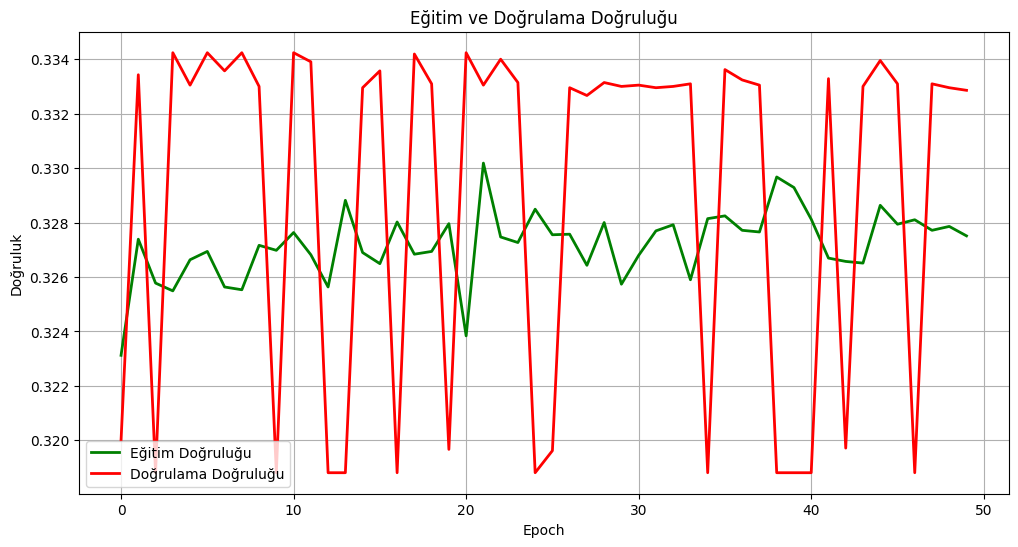

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Eğitim Kaybı', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı', color='orange', linewidth=2)
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu', color='green', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu', color='red', linewidth=2)
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)
plt.show()
